In [25]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)


In [26]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.08287071],
       [2.99175077]])

In [27]:
>>> X_new = np.array([[0], [2]])
>>> X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
>>> y_predict = X_new_b.dot(theta_best)
>>> y_predict

array([[ 4.08287071],
       [10.06637224]])

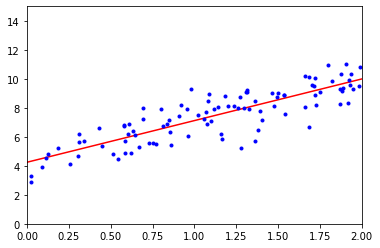

In [4]:
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [28]:
>>> from sklearn.linear_model import LinearRegression
>>> lin_reg = LinearRegression()
>>> lin_reg.fit(X, y)
>>> lin_reg.intercept_, lin_reg.coef_

(array([4.08287071]), array([[2.99175077]]))

In [6]:
>>> lin_reg.predict(X_new)

array([[4.24582288],
       [9.99238534]])

In [15]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization
for epoch in range(n_epochs):
    for i in range(epoch):
        random_index = np.random.randint(epoch)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * epoch + i)
        theta = theta - eta * gradients

In [16]:
theta

array([[4.23475323],
       [2.87453518]])

In [ ]:
#polynomial

In [17]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [18]:
>>> from sklearn.preprocessing import PolynomialFeatures
>>> poly_features = PolynomialFeatures(degree=2, include_bias=False)
>>> X_poly = poly_features.fit_transform(X)
>>> X[0]

array([0.63994853])

In [19]:
X_poly[0]

array([0.63994853, 0.40953412])

In [20]:
>>> lin_reg = LinearRegression()
>>> lin_reg.fit(X_poly, y)
>>> lin_reg.intercept_, lin_reg.coef_

(array([1.97495962]), array([[1.03076756, 0.47703063]]))

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

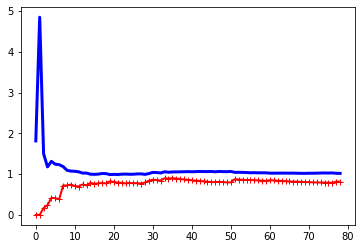

In [29]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
